# Diabetes DataSet

# Background of Diabetes according to Diabetes Research Instutite


Diabetes is caused by the body’s inability to create or effectively use its own insulin, which is produced by islet cells found in the pancreas. Insulin helps regulate blood sugar (glucose) levels – providing energy to body cells and tissues.

Without insulin, the body’s cells would be starved, causing dehydration and destruction of body tissue.
People with type 1 diabetes must have insulin delivered by injection or a pump to survive.
Many people with type 2 diabetes can control their blood glucose by following a healthy meal plan and a program of regular physical activity, losing excess weight, and taking medications. Medications for each individual with diabetes will often change during the course of the disease. Insulin also is commonly used to control blood glucose in people with type 2 diabetes.



**Within children**

In 2019, 283,000 children and adolescents younger than age 20 years had diagnosed diabetes. This includes 244,000 with type 1 diabetes.

1.6 million adults aged 20 years or older—or 5.7% of all US adults with diagnosed diabetes—reported both having type 1 diabetes and using insulin.
During 2014-2015, the estimated annual number of newly diagnosed cases of type 1 diabetes in the U.S. included 18,291 children and adolescents younger than age 20*.

Compared to adults aged 18 to 44 years, incidence rates of diagnosed diabetes were higher among adults aged 45 to 64 years and those aged 65 years and older.


Diabetes can affect many parts of the body and is associated with serious complications, such as heart disease, stroke, blindness, kidney failure, and lower-limb amputation, among other conditions.



In [ ]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


In [ ]:
# Loading data
df_diabetes = pd.read_csv('/diabetes_012_health_indicators_BRFSS2015.csv')
# df_diabetes.head()


In [ ]:
# Preview dataframe
df_diabetes.head()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [ ]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df_diabetes.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [ ]:
# Possible missing
df_diabetes.isna().sum().sort_values()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

**Dynamic number in the columns**

In [ ]:
#Age insight
df_diabetes['Age'].value_counts()

#Age range from 1 to 13 year olds

Age
9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: count, dtype: int64

In [ ]:
#AGE

#stats of Age
age_statistics = df_diabetes["Age"].agg(["mean", "median","min","max"])
age_statistics

mean       8.032119
median     8.000000
min        1.000000
max       13.000000
Name: Age, dtype: float64

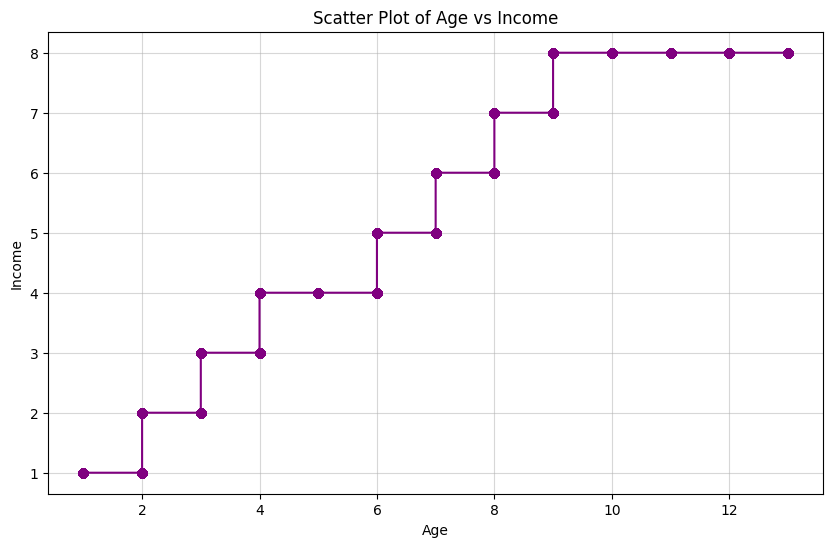

In [ ]:
# Scatter Plot of Age vs Income

plt.figure(figsize=(10, 6))
plt.plot(df_diabetes['Age'].sort_values(), df_diabetes['Income'].sort_values(), color='purple', marker='o', linestyle='-')
plt.title('Scatter Plot of Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True, alpha=0.5)
plt.show()

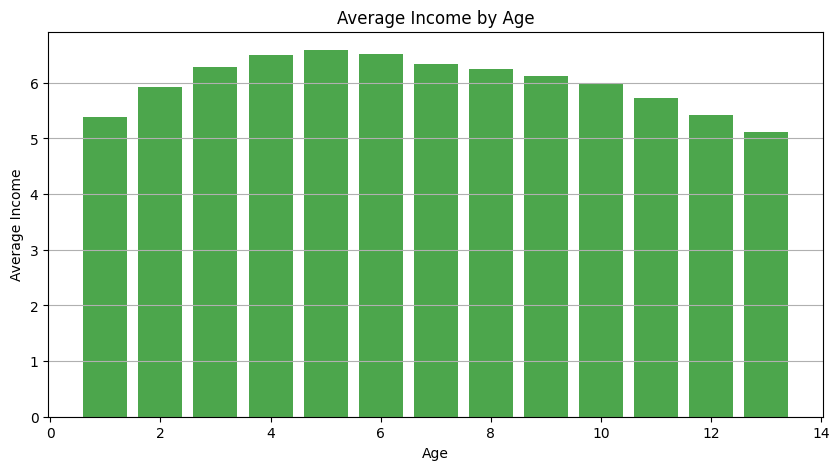

In [ ]:
# Age and Income Bar Chart
income_by_age = df_diabetes.groupby('Age')['Income'].mean()

plt.figure(figsize=(10, 5))
plt.bar(income_by_age.index, income_by_age.values, color='green', alpha=0.7)
plt.title('Average Income by Age')
plt.xlabel('Age')
plt.ylabel('Average Income')
plt.grid(axis='y')
plt.show()

In [ ]:
# Education
df_diabetes['Education'].value_counts()

# Primary grades of elementary (1st to 6th)

Education
6.0    107325
5.0     69910
4.0     62750
3.0      9478
2.0      4043
1.0       174
Name: count, dtype: int64

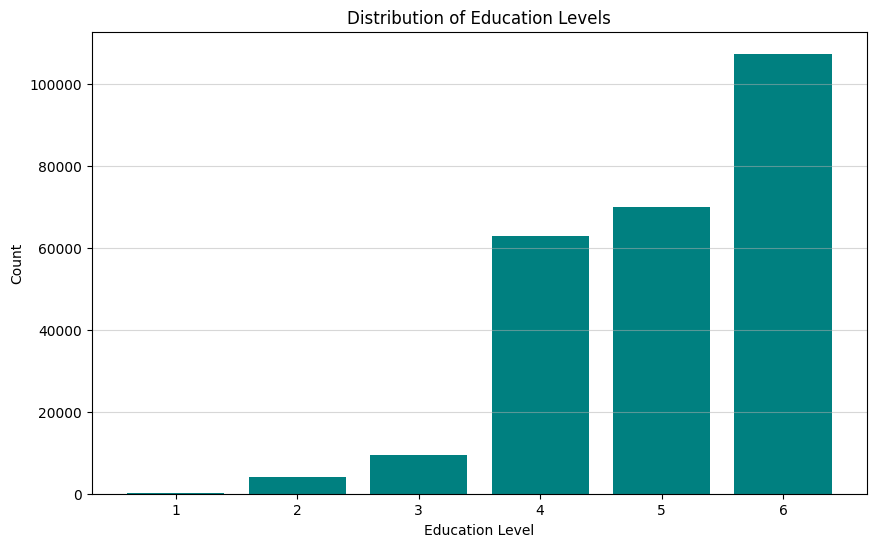

In [ ]:
# Education Bar Chart
education_counts = df_diabetes['Education'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(education_counts.index, education_counts.values, color='teal')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.5)
plt.show()

In [ ]:
# Gender
df_diabetes['Sex'].value_counts()

# O/1 for the two genders of the data male and female
# Possible distinction between both for growth and weigth based on development

Sex
0.0    141974
1.0    111706
Name: count, dtype: int64

In [ ]:
# Income
df_diabetes['Income'].value_counts()
# Selection of income levels
# Analyze the measure of income to understand the respresention of 1-8

Income
8.0    90385
7.0    43219
6.0    36470
5.0    25883
4.0    20135
3.0    15994
2.0    11783
1.0     9811
Name: count, dtype: int64

In [ ]:
# BMI: Body mass index
max_BMI= df_diabetes['BMI'].max()
min_BMI= df_diabetes['BMI'].min()
median_BMI= df_diabetes['BMI'].median()
print(max_BMI,"is very high weight for age and gender for children")
print(min_BMI,"is considered to be a healthy weight for age and gender for children")
print(median_BMI,"is considered to be a healthy weight for age and gender for children")

98.0 is very high weight for age and gender for children
12.0 is considered to be a healthy weight for age and gender for children
27.0 is considered to be a healthy weight for age and gender for children


In [ ]:
# Physical Activity
df_diabetes['PhysActivity'].value_counts()

# Values are in binary form

PhysActivity
1.0    191920
0.0     61760
Name: count, dtype: int64

In [ ]:
# Scatter Plot of BMI vs Age

scatter_plot = px.scatter(df_diabetes, x='BMI', y='Age', color='Diabetes_012',
                 size='Income', hover_data=['HighBP', 'HighChol'])
scatter_plot.update_layout(title='BMI vs Age (Color with Diabetes Status)',
                  xaxis_title='BMI',
                  yaxis_title='Age')
scatter_plot.show()

In [ ]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
#General Health
df_diabetes['GenHlth'].value_counts()


GenHlth
2.0    89084
3.0    75646
1.0    45299
4.0    31570
5.0    12081
Name: count, dtype: int64

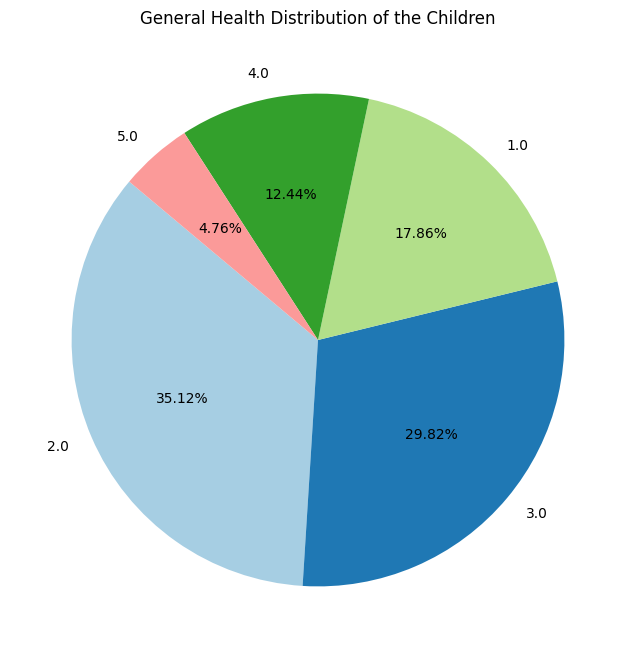

In [ ]:
genhlth_counts = df_diabetes['GenHlth'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(genhlth_counts, labels=genhlth_counts.index, autopct='%2.2f%%',
        colors=plt.cm.Paired.colors, startangle=140)
plt.title('General Health Distribution of the Children')
plt.show()